In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 


In [2]:
#Reading in data
df=pd.read_csv("MrBeast_youtube_stats.csv")
#df.head(2)

In [3]:
df.columns

Index(['id', 'title', 'description', 'publishTime', 'kind_stats',
       'duration_seconds', 'viewCount', 'likeCount', 'commentCount',
       'thumbnails.default.url', 'thumbnails.default.width',
       'thumbnails.default.height', 'thumbnails.medium.url',
       'thumbnails.medium.width', 'thumbnails.medium.height',
       'thumbnails.high.url', 'thumbnails.high.width',
       'thumbnails.high.height', 'contentDetails.duration',
       'contentDetails.dimension', 'topicDetails.topicCategories',
       'snippet.defaultLanguage', 'localizations.en.title',
       'localizations.en.description', 'snippet.tags',
       'contentDetails.contentRating.ytRating'],
      dtype='object')

In [4]:
df= df[[#'id', 
    'title', #'description',
    'publishTime', #'kind_stats', 
    'duration_seconds', 'viewCount', 'likeCount', 'commentCount',
      # 'thumbnails.default.url', 'thumbnails.default.width',
       #'thumbnails.default.height', 'thumbnails.medium.url',
       #'thumbnails.medium.width', 'thumbnails.medium.height',
       #'thumbnails.high.url', 'thumbnails.high.width',
       #'thumbnails.high.height', 'contentDetails.duration',
       #'contentDetails.dimension', 'topicDetails.topicCategories',
       #'snippet.defaultLanguage', 'localizations.en.title',
       #'localizations.en.description', 'snippet.tags',
      # 'contentDetails.contentRating.ytRating'
]]

In [5]:
#Renaming Columns
df=df.rename(columns={'title':'Title', 'publishTime':'PublishTime', 'duration_seconds':'Duration_Seconds', 'viewCount':'ViewCount',
       'likeCount':'LikeCount', 'commentCount':'CommentCount'})

In [6]:
#PublishTime is object. Change to date 
df.dtypes

Title                object
PublishTime          object
Duration_Seconds      int64
ViewCount           float64
LikeCount           float64
CommentCount        float64
dtype: object

In [7]:
#changing from object to time
df['PublishTime']=pd.to_datetime(df['PublishTime'])

In [8]:
#selecting non duplicated data
df=df.loc[~df.duplicated(subset=['Title', 'PublishTime', 'Duration_Seconds', 'ViewCount', 'LikeCount',
       'CommentCount'])]

In [9]:
#Dropping row NaN
df=df.drop([2], axis=0,)

In [10]:
#Checkibg Drop function 
df.head(10)

,Title,PublishTime,Duration_Seconds,ViewCount,LikeCount,CommentCount
0,I Got Hunted By A Real Bounty Hunter,2021-04-24 20:00:00+00:00,861,84717282.0,2876493.0,128922.0
1,"Extreme $1,000,000 Hide And Seek",2021-12-18 21:00:00+00:00,729,32090178.0,2125183.0,73593.0
3,I Bought The World&#39;s Largest Mystery Box! ...,2021-04-03 20:00:01+00:00,709,101745632.0,3110824.0,162796.0
4,"First To Rob Bank Wins $100,000",2021-09-26 20:00:06+00:00,482,50008942.0,2359606.0,120621.0
5,"Press This Button To Win $100,000!",2020-11-14 21:00:02+00:00,911,145527042.0,2762425.0,83853.0
6,I Survived 50 Hours In A Maximum Security Prison,2021-06-26 20:00:02+00:00,754,79464833.0,2214006.0,94886.0
7,I Spent 50 Hours Buried Alive,2021-03-27 20:00:04+00:00,760,154322660.0,5379027.0,233576.0
8,I Spent 24 Hours In A Doomsday Bunker,2020-04-11 20:00:00+00:00,719,102795467.0,2080395.0,77842.0
9,I Filled My Brother’s House With Slime &amp; B...,2020-10-10 20:00:31+00:00,625,95079717.0,2612376.0,116266.0
10,I Got Hunted By The FBI,2021-08-07 23:00:03+00:00,1000,71993932.0,2558283.0,88986.0


In [11]:
#Verifying that there are no duplicates
df.duplicated().sum()

0

In [12]:
#Checking the index. Here the index doesn't match column number. Have to reset index
df.tail()

,Title,PublishTime,Duration_Seconds,ViewCount,LikeCount,CommentCount
242,Remember When COD Was Fun?,2015-04-26 21:26:36+00:00,216,16312.0,574.0,145.0
243,Insane Gun Sync - 7 Hours To Make,2015-06-21 12:22:34+00:00,134,15740.0,637.0,105.0
244,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48+00:00,292,18502.0,508.0,117.0
245,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54+00:00,109,16627.0,430.0,134.0
246,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25+00:00,304,18773.0,370.0,59.0


In [13]:
#Resetting Index
df=df.reset_index(drop=True)

In [14]:
#check to see if the index is reset
df.tail()

,Title,PublishTime,Duration_Seconds,ViewCount,LikeCount,CommentCount
206,Remember When COD Was Fun?,2015-04-26 21:26:36+00:00,216,16312.0,574.0,145.0
207,Insane Gun Sync - 7 Hours To Make,2015-06-21 12:22:34+00:00,134,15740.0,637.0,105.0
208,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),2015-05-29 20:07:48+00:00,292,18502.0,508.0,117.0
209,L0114R - Biblical Creeper Post for Post @L0114R,2015-05-15 16:48:54+00:00,109,16627.0,430.0,134.0
210,How Much Money Do You Make As An Uber Driver??...,2015-05-31 18:31:25+00:00,304,18773.0,370.0,59.0


In [15]:
#Checking for NaN 
df.isna().sum()

Title               0
PublishTime         0
Duration_Seconds    0
ViewCount           0
LikeCount           1
CommentCount        1
dtype: int64

In [16]:
#Subtituting NaN with mean
df['LikeCount']=df['LikeCount'].fillna(value=df['LikeCount'].mean())
df['CommentCount']=df['CommentCount'].fillna(value=df['CommentCount'].mean())

In [17]:
df.isna().sum()

Title               0
PublishTime         0
Duration_Seconds    0
ViewCount           0
LikeCount           0
CommentCount        0
dtype: int64

Text(0, 0.5, 'Counts')

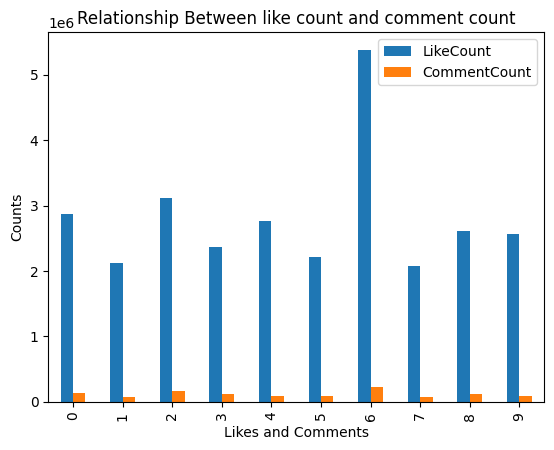

In [18]:
ax=df[['LikeCount', 'CommentCount']].head(10).plot(kind='bar', title='Relationship Between like count and comment count')
ax.set_xlabel('Likes and Comments')
ax.set_ylabel('Counts')

In [25]:
df.head()

,Title,PublishTime,Duration_Seconds,ViewCount,LikeCount,CommentCount
0,I Got Hunted By A Real Bounty Hunter,2021-04-24 20:00:00+00:00,861,84717282.0,2876493.0,128922.0
1,"Extreme $1,000,000 Hide And Seek",2021-12-18 21:00:00+00:00,729,32090178.0,2125183.0,73593.0
2,I Bought The World&#39;s Largest Mystery Box! ...,2021-04-03 20:00:01+00:00,709,101745632.0,3110824.0,162796.0
3,"First To Rob Bank Wins $100,000",2021-09-26 20:00:06+00:00,482,50008942.0,2359606.0,120621.0
4,"Press This Button To Win $100,000!",2020-11-14 21:00:02+00:00,911,145527042.0,2762425.0,83853.0


<Axes: xlabel='Duration_Seconds', ylabel='CommentCount'>

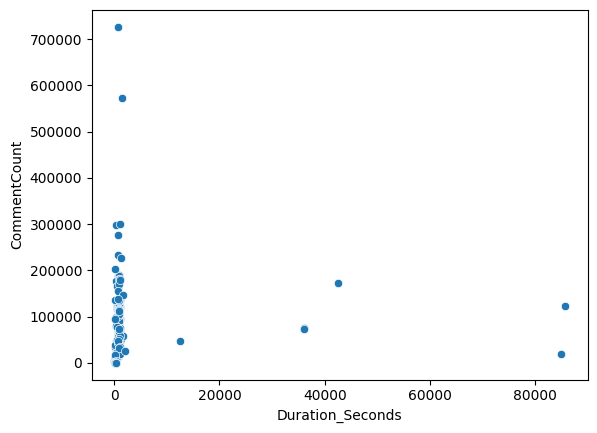

In [30]:
sns.scatterplot( x='Duration_Seconds', y='CommentCount', data=df)